# 1 - Introduction to Statistics: Distributions, Range, Standard Deviation, and Confidence Intervals

## 1. Measures of Central Variance (Range, Standard Deviation)

First, let's import the libraries we'll need:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## 1. Range

The range is the difference in maximum and minimum values in a dataset. It gives us a rough estimate about the spread of the data. 

# $R = \rm{max} - \rm{min}$

Here we import our dataset for NBA player stats in the 2021-2022 regular season. We list some important information, including a sample of the data so that we get a sense of what we are dealing with, and all of the column names

In [9]:
NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')

print(np.asarray(NBA_regular_2021.columns), len(NBA_regular_2021.columns))

display(NBA_regular_2021)

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS'] 30


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


### column meanings

In case you're not very familiar with NBA stats, here are the meanings of each column:

#### Rk: ID
#### Player: player name
#### Pos: position
#### Age: player age
#### Tm: team
#### G: games
#### GS: games started
#### MP: minutes played
#### FG: field goals made - the combined total number of two-point and three-point baskets scored by a player or team (not the same as points scored)
#### FGA: field goals attempted
#### FG%: field goal percentage
#### 3P: 3-pointers made - the total number of 3-point shots made
#### 3PA: 3-pointers attempted
#### 3P%: 3-point percentage
#### 2P: 2-pointers made - the total number of 2-point shots made
#### 2PA: 2-pointers attempted
#### 2P%: 2-point percentage
#### eFG%: effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
#### FT: free-throws made - the total number of free-throws made
#### FTA: free-throws attempted
#### FT%: free-throw precentage
#### ORB: offensive rebounds - the total number of rebounds collected by a player or team while playing offense
#### DRB: defensive rebounds - the total number of rebounds collected by a player or team while playing defense
#### TRB: total rebounds
#### AST: assists
#### STL: steals
#### BLK: blocks
#### TOV: turnovers (losing the ball to the other team before making a shot)
#### PF: personal fouls - the total number of personal fouls commited by the player
#### PTS: points scored

### Example: Find the range of ages in NBA players

In [10]:
MaxAge=np.max(NBA_regular_2021['Age'])
MinAge=np.min(NBA_regular_2021['Age'])

AgeRange = MaxAge - MinAge

print("Range of Ages of NBA players (2021): ", AgeRange)

Range of Ages of NBA players (2021):  22


### Example: Find the player with the max and min ages

You can also find the player with the lowest and highest Age for this season using the pandas `.idxmin()` and `.idxmax()` functions along with the `.loc` function which locates the entries in the datafram with those indexes

In [11]:
#First, find the index corresponding to the youngest and oldest player(s)
youngest_index = NBA_regular_2021['Age'].idxmin()
oldest_index = NBA_regular_2021['Age'].idxmax()

#Then, use .loc to locate the players with that index in the dataframe
#This creates new (small) dataframes for the youngest and oldest players, 
#which you can access like regular dataframes
youngest_player = NBA_regular_2021.loc[youngest_index]
oldest_player = NBA_regular_2021.loc[oldest_index]
display(oldest_player)
#Print the information about the youngest and oldest player - the 'Player' key gives us their names
print("Youngest player in NBA regular season (2021): %s, Age: %s" %(youngest_player['Player'], youngest_player['Age']))
print("Oldest player in NBA regular season (2021): %s, Age: %s" %(oldest_player['Player'], oldest_player['Age']))

Rk                  228
Player    Udonis Haslem
Pos                   C
Age                  41
Tm                  MIA
G                    13
GS                    0
MP                  6.4
FG                  1.1
FGA                 2.4
FG%               0.452
3P                  0.1
3PA                 0.3
3P%                0.25
2P                  1.0
2PA                 2.1
2P%               0.481
eFG%              0.468
FT                  0.2
FTA                 0.2
FT%                 1.0
ORB                 0.3
DRB                 1.6
TRB                 1.9
AST                 0.3
STL                 0.1
BLK                 0.1
TOV                 0.4
PF                  1.2
PTS                 2.5
Name: 298, dtype: object

Youngest player in NBA regular season (2021): Usman Garuba, Age: 19
Oldest player in NBA regular season (2021): Udonis Haslem, Age: 41


## 2. Standard Deviation
The standard deviation tells us how spread out the numbers in a dataset are from the average (mean). We calculate it with the forumlae:

### for an entire population
## $\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 }$

### for a sample of a population
## $s = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }$


We can use the std() function in pandas to find the standard deviation. By default it assumes that you are finding the standard deviation of a sample of a population, which is the safer bet if you are looking at a smaller number of players in the NBA. If you want to change it, you can change the `ddof` value, which controls how much we subtract from the denominator.

In [12]:
#Use pandas to find the standard deviation of the ages in NBA Player Ages for the regular season 
#We set ddof=0 to use the formula for an entire population!
Age_sigma=NBA_regular_2021['Age'].std(ddof=0)

print("Standard deviation of NBA player ages (2021): ", Age_sigma)

Standard deviation of NBA player ages (2021):  4.057139238521085


Let's visualize this distribution along with the mean

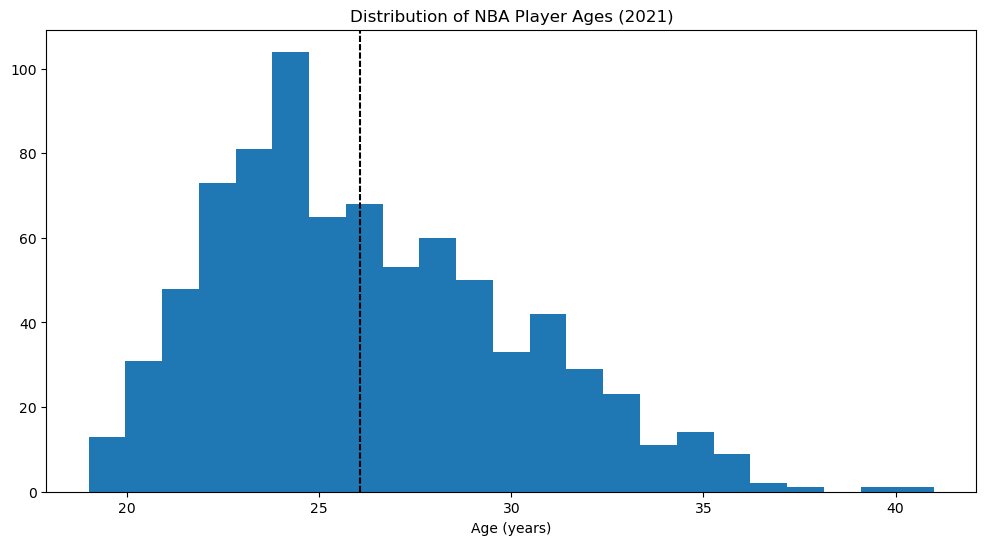

In [13]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2021)')

AverageAge=np.mean(NBA_regular_2021['Age'])

plt.hist(NBA_regular_2021['Age'], bins=23)
plt.axvline(AverageAge, color='black', dashes=[3,1])
plt.show()

## 3. Confidence intervals

Confidence intervals give us a range where we think the true average is.

For data that falls in a **normal distribution**, the standard deviation can inform us about how much data falls within each confidence interval
- First confidence interval: 68% of the data falls within 1 standard deviation of the mean
- Second confidence interval: 95% of the data falls within 2 standard deviations of the mean
- Third confidence interval: 99.7% of the data falls within 3 standard deviations of the mean

Now let's visualize the standard deviation and confidence intervals, to get a sense of the spread in the data

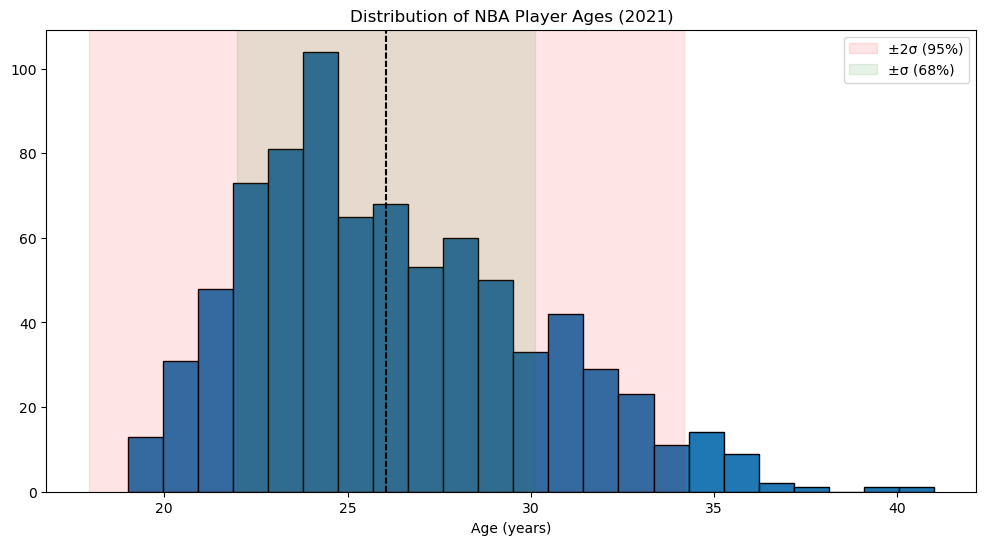

In [14]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.ylabel(
plt.title('Distribution of NBA Player Ages (2021)')

AverageAge=np.mean(NBA_regular_2021['Age'])

plt.hist(NBA_regular_2021['Age'], bins=23, edgecolor='black')
plt.axvline(AverageAge, color='black', dashes=[3,1])

plt.axvspan(AverageAge-2*Age_sigma, AverageAge+2*Age_sigma, 0, color='red', alpha=0.1, label='±2σ (95%)')
plt.axvspan(AverageAge-Age_sigma, AverageAge+Age_sigma, 0, color='green', alpha=0.1, label='±σ (68%)')

plt.legend()

plt.show()

### 🔍 EXERCISE 1: Find the range of NBA player Ages for the 2022 and 2023 regular seasons and playoff seasons. 

### Do the ranges change much? 

### If there is a difference in Age Ranges between years and regular vs playoff season, why do you think that is?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

NBA_regular_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')

print(np.asarray(NBA_regular_2022.columns), len(NBA_regular_2022.columns))

display(NBA_regular_2022)

NBA_playoffs_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Playoffs.csv', engine='python', delimiter=';', encoding='latin-1')

print(np.asarray(NBA_playoffs_2022.columns), len(NBA_playoffs_2022.columns))

display(NBA_playoffs_2022)

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS'] 30


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS'] 30


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,...,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
1,2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,...,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
2,3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,...,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
3,4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,...,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
4,5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,...,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,213,Ziaire Williams,SF,21,MEM,4,0,3.0,0.5,1.8,...,0.000,0.0,0.5,0.5,0.5,0.0,0.0,0.5,0.3,1.3
213,214,Trae Young,PG,24,ATL,6,6,38.3,10.0,24.8,...,0.860,0.8,2.8,3.7,10.2,1.7,0.7,4.0,1.8,29.2
214,215,Omer Yurtseven,C,24,MIA,8,0,2.0,0.3,0.9,...,0.000,0.4,0.3,0.6,0.1,0.0,0.1,0.1,0.3,0.5
215,216,Cody Zeller,C,30,MIA,21,0,8.3,1.0,1.7,...,0.400,0.5,1.8,2.3,0.3,0.1,0.2,0.6,1.3,2.2


In [15]:
MaxAge=np.max(NBA_regular_2022['Age'])
MinAge=np.min(NBA_regular_2022['Age'])

AgeRange = MaxAge - MinAge

print("Range of Ages of NBA players Regular (2022): ", AgeRange)

MaxAge=np.max(NBA_playoffs_2022['Age'])
MinAge=np.min(NBA_playoffs_2022['Age'])

AgeRange = MaxAge - MinAge

print("Range of Ages of NBA players Playoffs (2022): ", AgeRange)

Range of Ages of NBA players Regular (2022):  23
Range of Ages of NBA players Playoffs (2022):  23


### 🔍 EXERCISE 2: Find the standard deviation for NBA Player Ages in the 2022 Regular and Playoff seasons.

### What value of `ddof` should you use depending on the kind of season you are looking at?

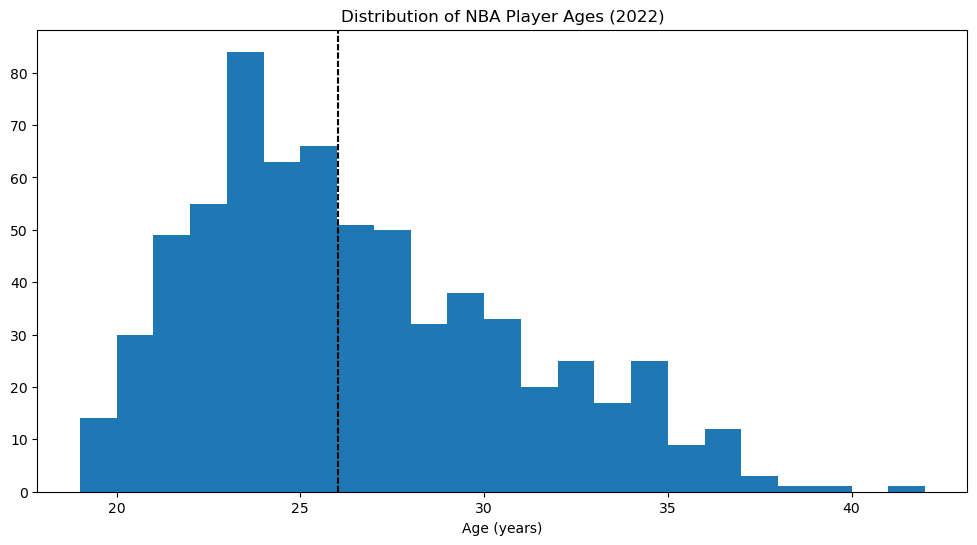

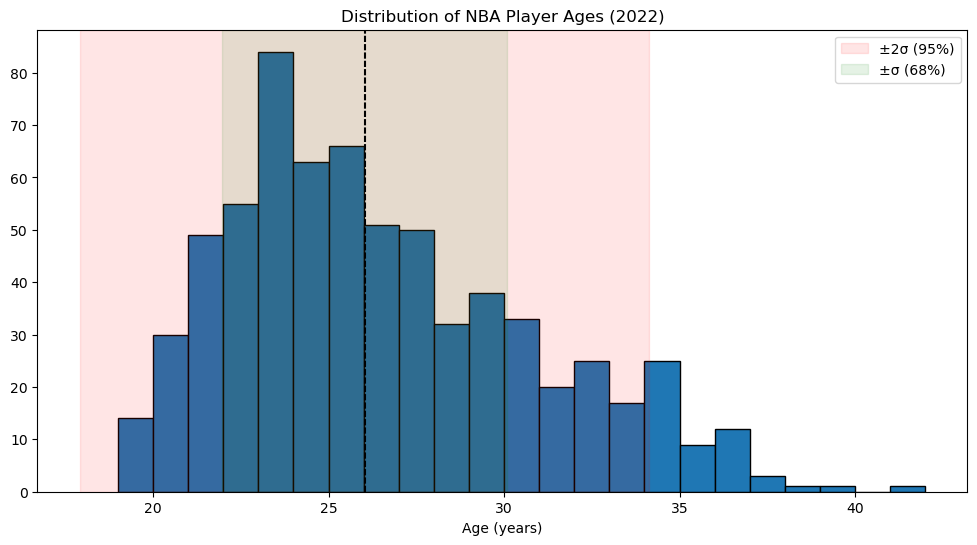

In [16]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2022)')

AverageAge=np.mean(NBA_regular_2022['Age'])

plt.hist(NBA_regular_2022['Age'], bins=23)
plt.axvline(AverageAge, color='black', dashes=[3,1])
plt.show()




plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2022)')

AverageAge=np.mean(NBA_regular_2022['Age'])

plt.hist(NBA_regular_2022['Age'], bins=23, edgecolor='black')
plt.axvline(AverageAge, color='black', dashes=[3,1])

plt.axvspan(AverageAge-2*Age_sigma, AverageAge+2*Age_sigma, 0, color='red', alpha=0.1, label='±2σ (95%)')
plt.axvspan(AverageAge-Age_sigma, AverageAge+Age_sigma, 0, color='green', alpha=0.1, label='±σ (68%)')

plt.legend()

plt.show()

In [17]:
Age_sigma=NBA_regular_2022['Age'].std(ddof=0)

print("Standard deviation of NBA player ages (2022): ", Age_sigma)

Standard deviation of NBA player ages (2022):  4.322522850256088


In [19]:
Age_sigma=NBA_playoffs_2022['Age'].std(ddof=0)

print("Standard deviation of NBA player ages (2022): ", Age_sigma)

Standard deviation of NBA player ages (2022):  4.392307055902796


### 🔍 EXERCISE 3: Play around with and visualize different stats for the 2021 Regular season NBA dataset (make histograms for different stats) 

### look for variables that have something close to a normal distribution - which ones can you find that fit this criterion. Why do you think that is?

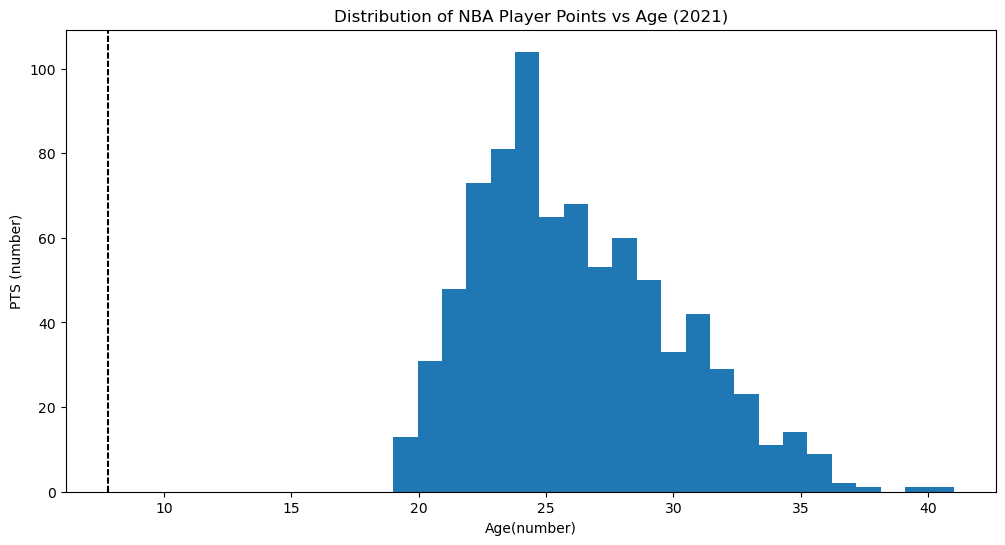

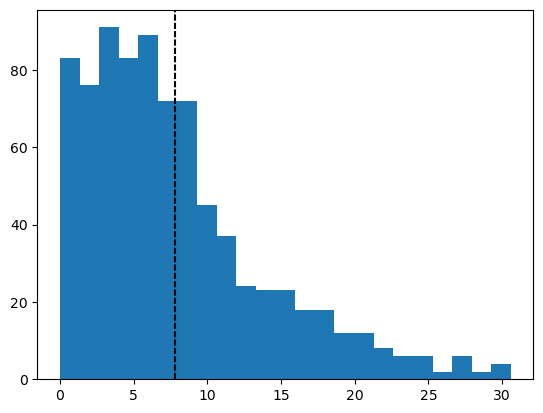

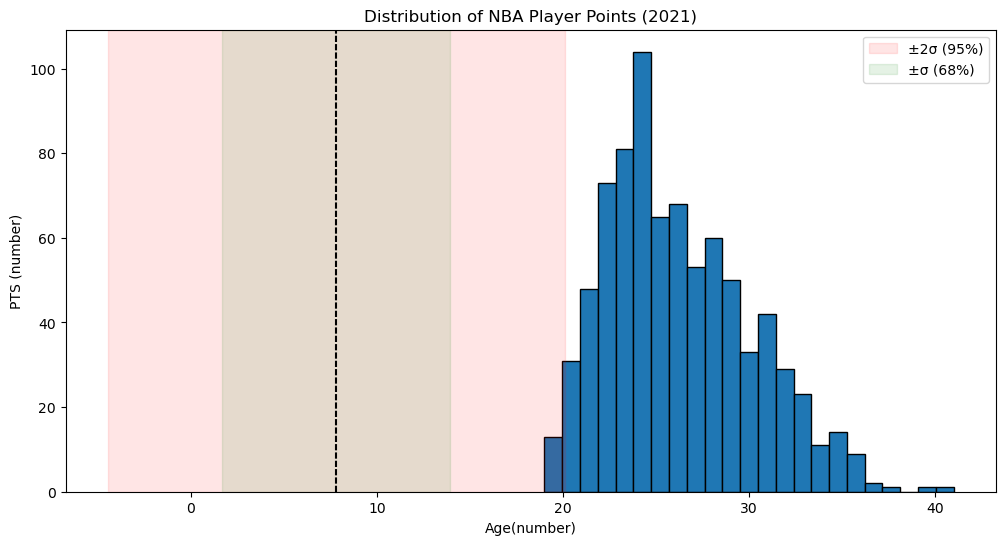

In [28]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age(number)')
plt.ylabel('PTS (number)')
plt.title('Distribution of NBA Player Points vs Age (2021)')
plt.axvline(AveragePTS, color='black', dashes=[3,1])
AveragePTS=np.mean(NBA_regular_2021['PTS'])

plt.hist(NBA_regular_2021['Age'], bins=23)

plt.show()

plt.hist(NBA_regular_2021['PTS'], bins=23)
plt.axvline(AveragePTS, color='black', dashes=[3,1])
plt.show()




plt.figure(figsize=(12, 6))
plt.xlabel('Age(number)')
plt.ylabel('PTS (number)')
plt.title('Distribution of NBA Player Points (2021)')

AveragePTS=np.mean(NBA_regular_2021['PTS'])
PTS_sigma = np.std(NBA_regular_2021['PTS']) # Define PTS_sigma here

plt.hist(NBA_regular_2021['Age'], bins=23, edgecolor='black')
plt.axvline(AveragePTS, color='black', dashes=[3,1])

plt.axvspan(AveragePTS-2*PTS_sigma, AveragePTS+2*PTS_sigma, 0, color='red', alpha=0.1, label='±2σ (95%)')
plt.axvspan(AveragePTS-PTS_sigma, AveragePTS+PTS_sigma, 0, color='green', alpha=0.1, label='±σ (68%)')

plt.legend()

plt.show()

### 🔍 EXERCISE 4: Find the standard deviation of the data you chose

In [29]:
PTS_sigma=NBA_regular_2021['PTS'].std(ddof=0)

print("Standard deviation of NBA player Points (2021): ", PTS_sigma)

Standard deviation of NBA player Points (2021):  6.134295938812184


### 🔍 EXERCISE 5: On your histogram, visualize the mean of the population with a vertical line

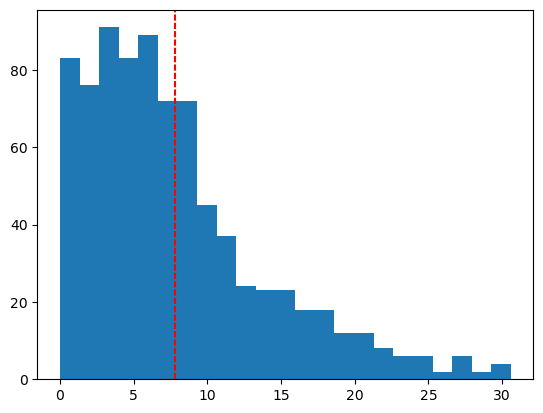

In [31]:
AveragePTS=np.mean(NBA_regular_2021['PTS'])

plt.hist(NBA_regular_2021['PTS'], bins=23)
plt.axvline(AveragePTS, color='red', dashes=[3,1])
plt.show()


### 🔍 EXERCISE 6: visualize the 1$\sigma$ and 2$\sigma$ confidence intervals on this histogram - what can you say about the confidence intervals? What percentage of the data can you expect to find within each interval?

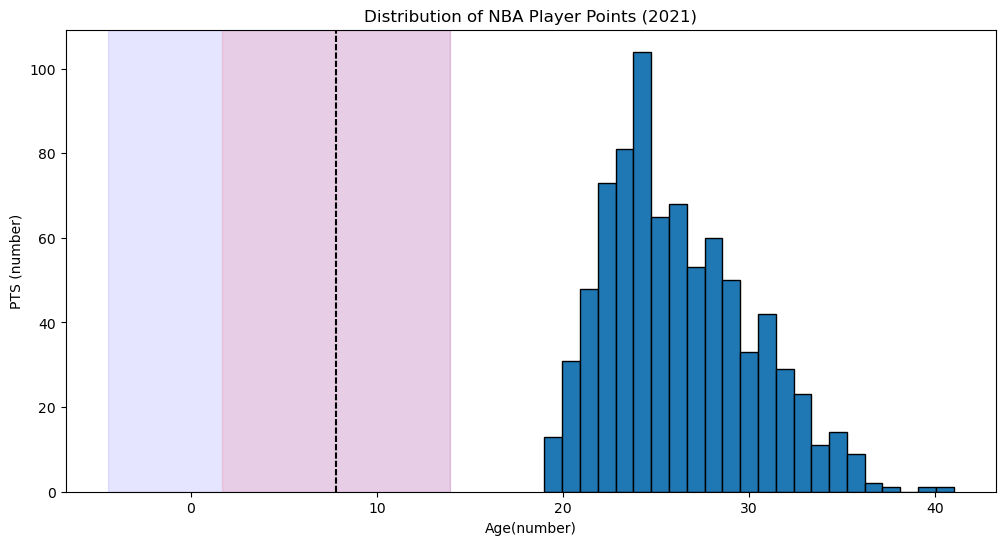

In [40]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age(number)')
plt.ylabel('PTS (number)')
plt.title('Distribution of NBA Player Points (2021)')

AveragePTS=np.mean(NBA_regular_2021['PTS'])
PTS_sigma = np.std(NBA_regular_2021['PTS']) # Define PTS_sigma here

plt.hist(NBA_regular_2021['Age'], bins=23, edgecolor='black')
plt.axvline(AveragePTS, color='black', dashes=[3,1])
plt.axvspan(AveragePTS - 1 * PTS_sigma, AveragePTS + 1 * PTS_sigma, color='red', zorder=0, alpha=0.1,)
plt.axvspan(AveragePTS - 2 * PTS_sigma, AveragePTS + 1 * PTS_sigma, color='blue', zorder=-1, alpha=0.1,)

### BONUS CONTENT

### 🔍 EXERCISE 7: Choose three NBA stats of interest. Find the player in each season (including playoff seasons) with the lowest and highest value in that stat

### Search the internet for the MVP of each season. Does he appear in your list of players for the stats you considered?

### What other information can you show about these players?

In [43]:

Games_started = NBA_regular_2021['GS']
Three_pointers = NBA_regular_2021['3P']
Minutes_played = NBA_regular_2021['MP']


#First, find the index corresponding to the youngest and oldest player(s)
least_games = Games_started.idxmin()
most_games = Games_started.idxmax()

#Then, use .loc to locate the players with that index in the dataframe
#This creates new (small) dataframes for the youngest and oldest players, 
#which you can access like regular dataframes
least_GS_player = NBA_regular_2021.loc[least_games]
most_GS_player = NBA_regular_2021.loc[most_games]

#Print the information about the youngest and oldest player - the 'Player' key gives us their names
print("Least experienced player in NBA regular season (2021): %s, Age: %s" %(least_GS_player['Player'], least_GS_player['Age']))
print("Most experienced player in NBA regular season (2021): %s, Age: %s" %(most_GS_player['Player'], most_GS_player['Age']))

Least experienced player in NBA regular season (2021): Santi Aldama, Age: 21
Most experienced player in NBA regular season (2021): Saddiq Bey, Age: 22


### 🔍 EXERCISE 8: Choose a single NBA stat and find the mean and standard deviation for it for a single season. 

### Which players fall outside of the 2$\sigma$ confidence interval (in other words, which players have stats lower or higher than $\bar{x} \pm 2\sigma$)?

### What percentage of the data do these players represent? (remember that everyone *inside* of the 2$\sigma$ interval represent 95% of the data - these players fall *outside* of that). Can we consider these players outliers? Why?